## 00. Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

## 01. Loading MEFAR PreProcessed DataSet

In [3]:
MEFAR_DOWN = pd.read_csv('../raw_data//MEFAR_preprocessed/MEFAR_DOWN.csv')
MEFAR_MID = pd.read_csv('../raw_data//MEFAR_preprocessed/MEFAR_MID.csv')
MEFAR_UP = pd.read_csv('../raw_data//MEFAR_preprocessed/MEFAR_UP.csv')

In [15]:
MEFAR_MID.head()

,BVP,EDA,TEMP,AccX,AccY,AccZ,HR,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation,class
0,-0.150426,0.026215,0.778824,-0.325490,0.019608,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
1,-0.145506,0.026215,0.778824,-0.333333,-0.003922,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
2,-0.135576,0.026215,0.778824,-0.349020,-0.035294,0.333333,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
3,-0.121047,0.026215,0.778824,-0.380392,-0.027451,0.356863,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
4,-0.103369,0.026215,0.778824,-0.411765,-0.011765,0.411765,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0


## 02. Data Exploration & Visualization

In [4]:
MEFAR_DOWN.head()

,BVP,EDA,TEMP,AccX,AccY,AccZ,HR,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation,class
0,0.009990,-0.023451,0.778824,-0.145540,-0.127273,0.371179,0.352246,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909,1.0
1,0.007775,-0.050473,0.778824,-0.145540,-0.127273,0.379913,0.357959,0.016627,0.018269,0.000885,0.007088,0.009263,0.005343,0.001643,0.008448,0.040404,0.444444,1.0
2,-0.070514,-0.069910,0.778824,-0.136150,-0.100000,0.388646,0.363152,0.042245,0.000499,0.000753,0.000366,0.268484,0.002063,0.068640,0.001032,0.010101,0.545455,1.0
3,0.028787,-0.068803,0.781176,-0.333333,-0.072727,-0.406114,0.368476,0.047853,0.005451,0.094100,0.001209,0.009866,0.085111,0.560372,0.036195,0.464646,0.888889,1.0
4,-0.097677,-0.118167,0.774118,-0.333333,-0.109091,-0.353712,0.373929,0.078491,0.027422,0.004414,0.000444,0.009305,0.001604,0.005226,0.000079,0.363636,0.242424,1.0


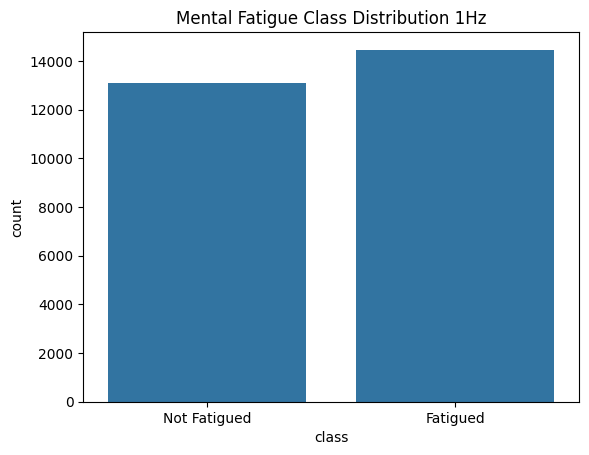

In [5]:
# Check if the data is balanced at 1Hz:
sns.countplot(data=MEFAR_DOWN, x='class')
plt.title("Mental Fatigue Class Distribution 1Hz")
plt.xticks([0,1],['Not Fatigued', 'Fatigued'])
plt.show()

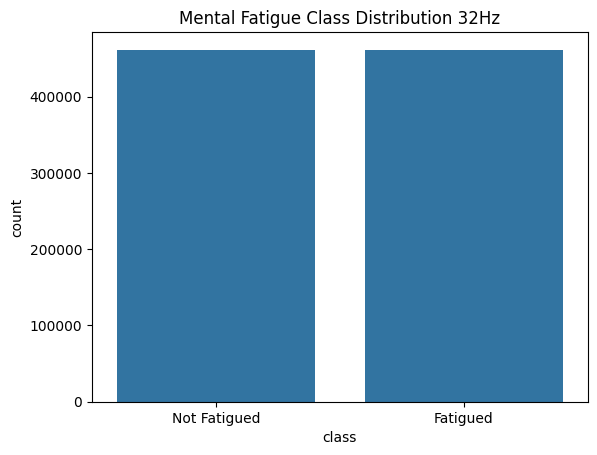

In [6]:
# Check if the data is balanced at 32Hz:
sns.countplot(data=MEFAR_MID, x='class')
plt.title("Mental Fatigue Class Distribution 32Hz")
plt.xticks([0,1],['Not Fatigued', 'Fatigued'])
plt.show()

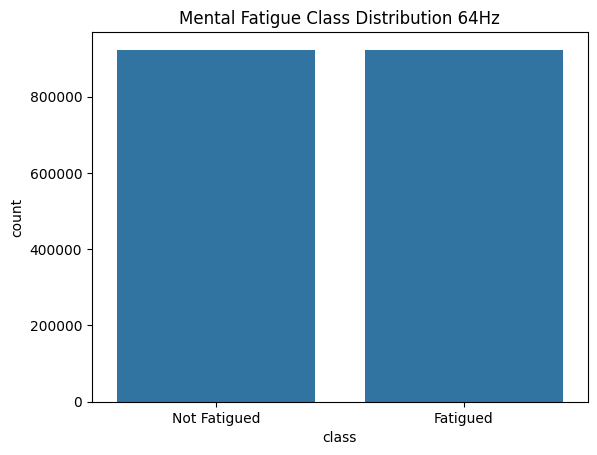

In [7]:
# Check if the data is balanced at 64Hz:
sns.countplot(data=MEFAR_UP, x='class')
plt.title("Mental Fatigue Class Distribution 64Hz")
plt.xticks([0,1],['Not Fatigued', 'Fatigued'])
plt.show()

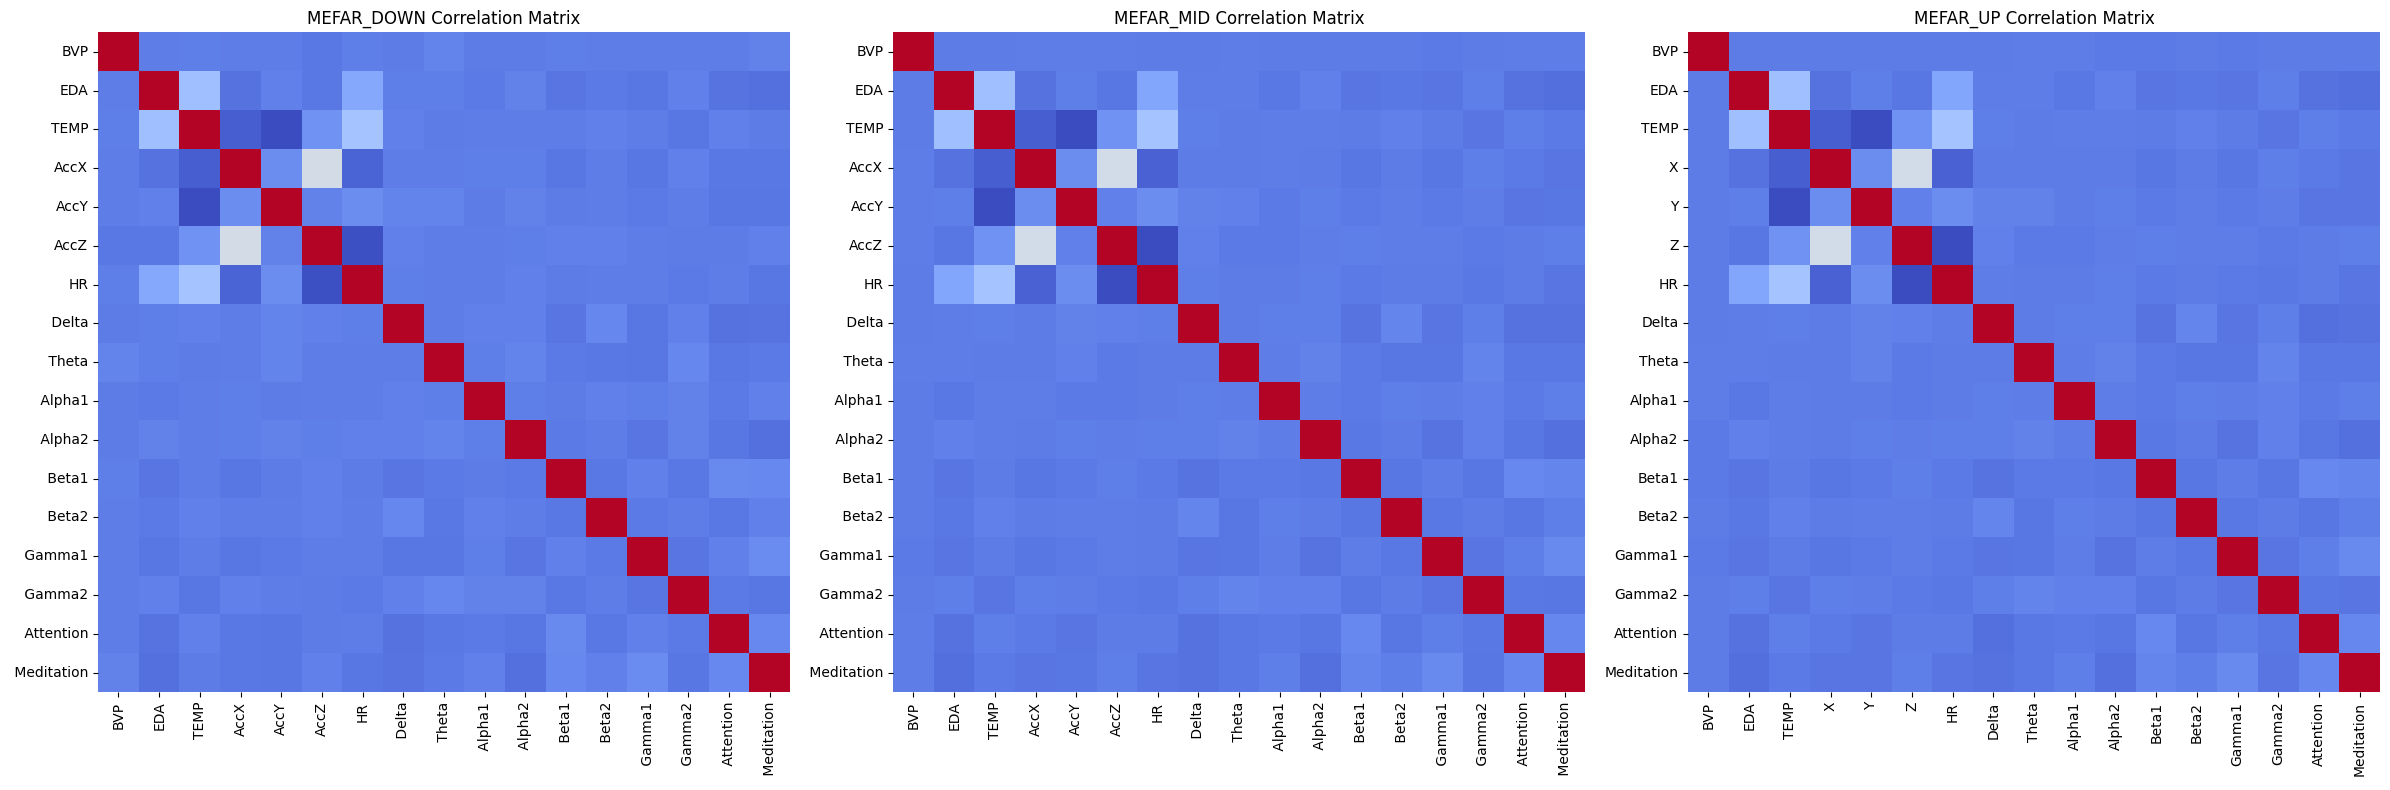

In [8]:

# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Correlation matrices
corrs = [
    ('MEFAR_DOWN', MEFAR_DOWN.drop(columns=['class']).corr()),
    ('MEFAR_MID', MEFAR_MID.drop(columns=['class']).corr()),
    ('MEFAR_UP', MEFAR_UP.drop(columns=['class']).corr())
]

# Plot each heatmap
for ax, (title, corr) in zip(axes, corrs):
    sns.heatmap(corr, ax=ax, cmap='coolwarm', cbar=False)
    ax.set_title(f"{title} Correlation Matrix")

plt.tight_layout()
plt.show()


## 04. Benchmark Models -32Hz:

In [16]:
# Set the X and y variable:
X = MEFAR_MID.drop(columns=['class'])
y = MEFAR_MID['class']
X.head()


,BVP,EDA,TEMP,AccX,AccY,AccZ,HR,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation
0,-0.150426,0.026215,0.778824,-0.325490,0.019608,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
1,-0.145506,0.026215,0.778824,-0.333333,-0.003922,0.388235,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
2,-0.135576,0.026215,0.778824,-0.349020,-0.035294,0.333333,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
3,-0.121047,0.026215,0.778824,-0.380392,-0.027451,0.356863,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909
4,-0.103369,0.026215,0.778824,-0.411765,-0.011765,0.411765,0.357959,0.019138,0.082949,0.017362,0.020516,0.001465,0.002844,0.021253,0.044376,0.484848,0.090909


In [13]:
# Randomly sample 100 000 rows from the MEFAR MID dataset, including all features.
X_sample = X.sample(n=100_000,random_state=42)
y_sample = y.loc[X_sample.index]
X_sample.head()

,BVP,EDA,TEMP,AccX,AccY,AccZ,HR,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation
222120,-0.141692,-0.967113,-0.049412,-0.254902,0.184314,0.403922,0.230719,0.000010,0.046749,0.002258,0.051313,0.004010,0.002544,0.046550,0.002680,0.969697,0.838384
331441,-0.169278,-0.822453,0.150588,0.066667,-0.482353,0.129412,0.463776,0.013987,0.100655,0.019218,0.044871,0.434872,0.010123,0.038828,0.000258,0.767677,0.020202
607722,-0.192807,-0.964438,0.458824,-0.490196,-0.113725,0.098039,0.473513,0.002033,0.107428,0.001403,0.040398,0.000711,0.086779,0.001647,0.005499,0.808081,0.070707
18147,-0.144986,0.548951,0.552941,0.043137,-0.341176,0.372549,0.472864,0.065643,0.006211,0.037622,0.086969,0.139239,0.028675,0.010796,0.016909,0.050505,0.565657
110171,-0.178970,-0.934670,0.336471,-0.325490,-0.145098,0.388235,0.391716,0.004549,0.048929,0.013434,0.035548,0.059373,0.000543,0.188879,0.097105,0.888889,0.282828


In [14]:
# Randomly sample 100 000 rows from the MEFAR MID dataset, including only EEG features.
X_sample_EEG = X_sample.drop(['BVP', 'EDA', 'TEMP', 'AccX', 'AccY', 'AccZ', 'HR'], axis=1)
X_sample_EEG.head()

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Attention,Meditation
222120,0.000010,0.046749,0.002258,0.051313,0.004010,0.002544,0.046550,0.002680,0.969697,0.838384
331441,0.013987,0.100655,0.019218,0.044871,0.434872,0.010123,0.038828,0.000258,0.767677,0.020202
607722,0.002033,0.107428,0.001403,0.040398,0.000711,0.086779,0.001647,0.005499,0.808081,0.070707
18147,0.065643,0.006211,0.037622,0.086969,0.139239,0.028675,0.010796,0.016909,0.050505,0.565657
110171,0.004549,0.048929,0.013434,0.035548,0.059373,0.000543,0.188879,0.097105,0.888889,0.282828


In [17]:
# Train/Test Split Sample Set dataframe containing all features:
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample, test_size=0.2,random_state=42)

In [18]:
# Train/Test Split Sample Set dataframe containing EEG features:
X_train_EEG, X_test_EEG, y_train_EEG, y_test_EEG = train_test_split(X_sample_EEG,y_sample, test_size=0.2,random_state=42)

In [19]:
# Define pipeline for each Model, no preprocess as data already pre-processed.
pipelines = {
    "Logistic Regression": make_pipeline(LogisticRegression(max_iter=1000)),
    "Random Forest": make_pipeline(RandomForestClassifier(n_estimators=100)),
    "SVM": make_pipeline(SVC()),
    "XGBoost": make_pipeline(xgb.XGBClassifier(eval_metric='logloss')),
}

In [20]:
# Cross-Validation Scores for EEG dataset with all features.
for name, pipe in pipelines.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    print(f"{name}: {scores.mean():.3f} ± {scores.std():.3f}")

Logistic Regression: 0.643 ± 0.005
Random Forest: 0.995 ± 0.000
SVM: 0.791 ± 0.002
XGBoost: 0.996 ± 0.001


* **Logistic Regression** - 64%, model accuracy is modest, suggesting the data has complex relationships and a linear model can't fully capture. 
* **Random Forest & XGBoost** - 99% & 96% respectively, ensemble tree-based models suggests it captures the non-linear patterns well. Too Well? _data leakage, class imbalance. 
* **SVM** - 79% Indicates that the data is not linearly seperable, but SVM is capturing structure. 
 

In [21]:
# Cross-Validation Scores for EEG dataset with limited features.
for name, pipe in pipelines.items():
    scores = cross_val_score(pipe, X_train_EEG, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    print(f"{name}: {scores.mean():.3f} ± {scores.std():.3f}")

Logistic Regression: 0.515 ± 0.001
Random Forest: 0.956 ± 0.002
SVM: 0.545 ± 0.005
XGBoost: 0.805 ± 0.003


## 05. Deep Learning Models -32Hz:

In [1]:
# timesteps = sampling rate (32Hz) * window_length_in_seconds (I am selecting a 10-second window)
window_length_sec = 10  # each window covers 10 seconds of data.
sampling_rate = 32 # There are 32 samples per second in MEFAR_MID
timesteps = sampling_rate * window_length_sec


n_samples = len(MEFAR_MID) // timesteps # calculating how many full windows fit in the dataset
features = MEFAR_MID.shape[1]


X_features = MEFAR_MID.drop(columns=['class'])
y_labels = MEFAR_MID['class']

X_array = X_features.iloc[:n_samples * timesteps, :].values # take only the rows that fit into complete windows and convert to a numpy array.
X_timestep = X_array.reshape(n_samples, timesteps, X_features.shape[1])  # Reshape the array to shape (n_samples, timesteps, features)

NameError: name 'MEFAR_MID' is not defined

In [ ]:
# Extract the class labels as a 1D numpy array, using only the rows that fit into full windows
labels = MEFAR_MID['class'].values[:n_samples * timesteps]

# Reshape the labels to (n_samples, timesteps), so each window's labels are grouped together
y_window = labels.reshape(n_samples, timesteps)
# For each window, compute the average label and set to 1 (fatigued) if majority is >0.5, else 0 (not fatigued)
y_window = (y_window.mean(axis=1) > 0.5).astype(int)

In [36]:
X_timestep.shape

(2885, 320, 17)

In [37]:
y_window.shape

(2885,)

In [38]:
X_train_window, X_test_window, y_train_window, y_test_window = train_test_split(
    X_timestep, y_window, test_size=0.2, stratify=y_window, random_state=42
)

In [43]:
# 1D Convolutional Neural Network (CNN) for Time Series.
# Get the number of time steps per window from training data shape
timesteps = X_train_window.shape[1]     # 320 (10 seconds at 32 Hz)

# Get the number of channels (features) per time step from training data shape
n_channels = X_train_window.shape[2]    # 17  features per sample

# Define the 1D Convolutional Neural Network architecture
model = models.Sequential([

    # First 1D convolutional layer:
    # - 32 filters
    # - Kernel size of 3 (looks at 3 time steps at a time)
    # - 'relu' activation function for non-linearity
    # - Input shape expects (timesteps, n_channels)
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(timesteps, n_channels)),

    # Max pooling layer to downsample the output by taking the max value over each window of 2 time steps
    layers.MaxPooling1D(2),

    # Second 1D convolutional layer:
    # - 64 filters
    # - Kernel size of 3
    layers.Conv1D(64, kernel_size=3, activation='relu'),

    # Global average pooling: reduces each feature map to a single value by averaging across all time steps
    layers.GlobalAveragePooling1D(),

    # Dense (fully connected) layer with 32 neurons and 'relu' activation
    layers.Dense(32, activation='relu'),

    # Output layer:
    # - 1 neuron (for binary classification)
    # - 'sigmoid' activation to produce probability between 0 and 1
    layers.Dense(1, activation='sigmoid')
])

# Compile the model:
# - 'adam' optimizer for efficient training
# - 'binary_crossentropy' loss for binary classification
# - Track 'accuracy' metric during training/validation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture (layers and parameter counts)
model.summary()

# Train the model:
# - Use X_train and y_train for training data
# - Use X_test and y_test for validation during training
# - Run for 30 epochs
# - Use batches of 64 samples
history = model.fit(
    X_train_window, y_train_window,                   # Training data
    validation_data=(X_test_window, y_test_window),   # Validation data
    epochs=30,                          # Number of passes through the dataset
    batch_size=64                       # Number of samples per gradient update
)

/Users/timoturnley/.pyenv/versions/3.10.6/envs/Neurocheck/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 318, 32)        │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 159, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 157, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,985 (39.00 KB)

 Trainable params: 9,985 (39.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5627 - loss: 0.6777 - val_accuracy: 0.6153 - val_loss: 0.6541
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6413 - loss: 0.6255 - val_accuracy: 0.6499 - val_loss: 0.6233
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6584 - loss: 0.6037 - val_accuracy: 0.6932 - val_loss: 0.5841
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6938 - loss: 0.5672 - val_accuracy: 0.7019 - val_loss: 0.5564
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7170 - loss: 0.5338 - val_accuracy: 0.7123 - val_loss: 0.5549
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7335 - loss: 0.5188 - val_accuracy: 0.7192 - val_loss: 0.5408
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7471 - loss: 0.5131 - val_accuracy: 0.7730 - val_loss: 0.4974
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7651 - loss: 0.4835 - val_accuracy: 0.7487 - val_loss:

In [45]:
# Keras LSTM Model

# Get the shape parameters
timesteps = X_train_window.shape[1]
n_channels = X_train_window.shape[2]

# Define an LSTM-based model
model = models.Sequential([
    # First LSTM layer with 64 units; returns sequences for stacking
    layers.LSTM(64, return_sequences=True, input_shape=(timesteps, n_channels)),

    # Second LSTM layer with 32 units; returns the final hidden state only
    layers.LSTM(32),

    # Fully connected (Dense) layer with ReLU activation
    layers.Dense(32, activation='relu'),

    # Output layer for binary classification
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(
    X_train_window, y_train_window,
    validation_data=(X_test_window, y_test_window),
    epochs=30,
    batch_size=64
)

/Users/timoturnley/.pyenv/versions/3.10.6/envs/Neurocheck/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 320, 64)        │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,497 (134.75 KB)

 Trainable params: 34,497 (134.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.5340 - loss: 0.6818 - val_accuracy: 0.6499 - val_loss: 0.6324
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6514 - loss: 0.6203 - val_accuracy: 0.6759 - val_loss: 0.6097
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6828 - loss: 0.5968 - val_accuracy: 0.6898 - val_loss: 0.6008
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6913 - loss: 0.5747 - val_accuracy: 0.6707 - val_loss: 0.6183
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6825 - loss: 0.5841 - val_accuracy: 0.6915 - val_loss: 0.5900
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.6898 - loss: 0.5799 - val_accuracy: 0.7036 - val_loss: 0.5892
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7062 - loss: 0.5603 - val_accuracy: 0.7210 - val_loss: 0.5531
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.7357 - loss: 0.5255 - val_accuracy: 0.7140 - v

## 06. Model Assesment and Improvements (PENDING)